In [2]:
revenue = 0
prices = [1,2]
amounts= [1,2]
for price,amount in zip(prices,amounts):
    revenue += price * amount
revenue

5

In [4]:
import numpy as np
revenue = np.dot(prices,amounts)
revenue

5

In [5]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [10]:
m1 = [[1,2,3,4]]
m2 = np.array([[1,2,3,4]],dtype=np.float32)
m3 = tf.constant([[1.0,2.0,3.0,4.0]],dtype=tf.float32)
print(type(m1))
print(type(m2))
print(type(m3))

t1 = tf.convert_to_tensor(m1,dtype=tf.float32)
t2 = tf.convert_to_tensor(m2,dtype=tf.float32)
t3 = tf.convert_to_tensor(m3,dtype=tf.float32)
print(type(t1))
print(type(t2))
print(type(t3))


<class 'list'>
<class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [11]:
t1 = tf.constant([1,2],name="kindergaten")
print(t1)

tf.Tensor([1 2], shape=(2,), dtype=int32)


In [14]:
tf.ones(shape=(500,500) )* 0.5

<tf.Tensor: shape=(500, 500), dtype=float32, numpy=
array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]], dtype=float32)>

In [16]:
simple = tf.constant([[1,2]])
simple = -simple
simple

<tf.Tensor: shape=(1, 2), dtype=int32, numpy=array([[-1, -2]])>

In [19]:
from math import pi
def generate_gaussian(X,mean,std):
    coef = 1 / (std * tf.sqrt(2*pi))
    exparg = -(1/2) * tf.pow(((X-mean) / std),2)
    exp = tf.exp(exparg)
    return coef * exp

In [20]:
generate_gaussian(2,1,1)

<tf.Tensor: shape=(), dtype=float32, numpy=0.24197073>

In [25]:
# Section Using Tf 1.0

with tf.compat.v1.Session() as sess:
    x = tf.constant([[1.,2.]])
    neg = tf.negative(x)
    result = sess.run(neg)
print(result)

[[-1. -2.]]


In [26]:
# Section use Tf 2.0
x = tf.constant([[1,2]])
neg_mat = -x
print(neg_mat.numpy())


[[-1 -2]]


## Core Tensorflow 
#### Placeholder -- Biasa untuk input dan output
#### Variable -- Mutable
#### Constant -- Immutable

In [28]:
import tensorflow.compat.v1 as tf1
tf1.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [30]:
sess = tf1.compat.v1.InteractiveSession()
x = tf.constant([1,2])
negMatrix = -x
result = negMatrix.eval()
print(result)
sess.close()

[-1 -2]


In [35]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [1]:
#Tensorflow automatically determines using cpu or gpu for doing such operations
import tensorflow as tf
tf.debugging.set_log_device_placement(True)
x = tf.constant([1,2])
print(x)

tf.Tensor([1 2], shape=(2,), dtype=int32)


In [19]:
#using tf variables
raw_data = [1,2,3,4,9,6,13]
spike = tf.Variable(False)

for i in range(1,len(raw_data)):
    if raw_data[i] - raw_data[i-1] > 5:
        spike.assign(True)
    else:
        spike.assign(False)
    print(f"Spike {spike.numpy()}")
print(type(spike))

Spike False
Spike False
Spike False
Spike False
Spike False
Spike True
<class 'tensorflow.python.ops.resource_variable_ops.ResourceVariable'>


In [9]:
# Saving Variables
raw_dat = [1,9,8,9,1,3,6]
spikes = tf.Variable([False] * len(raw_dat),name="spikes") # Behaviour different with other variables

checkPoint = tf.train.Checkpoint(spikes=spikes)
manager = tf.train.CheckpointManager(checkPoint, './tf_checkpoinVar',max_to_keep=3)

spikes_Val = [False for i in range(0,len(raw_dat))] # Need to generate before assigned data to spikes

for i in range(1,len(raw_dat)):
    if raw_dat[i] - raw_data[i-1] > 5 :
        spikes_Val[i] = True
        spikes.assign(spikes_Val)
        save_path = manager.save()
        print("Saved Checkpoint at : %s"% save_path)
print(spikes.numpy())

Saved Checkpoint at : ./tf_checkpoinVar\ckpt-1
Saved Checkpoint at : ./tf_checkpoinVar\ckpt-2
Saved Checkpoint at : ./tf_checkpoinVar\ckpt-3
[False  True  True  True False False False]


In [13]:
# Loading Tf Variables
checkPoint.restore(manager.latest_checkpoint)
if manager.latest_checkpoint:
    print("Restored from %s" % manager.latest_checkpoint)
to_restore = tf.Variable([False] * len(raw_dat),name="spikes")
restored =tf.train.Checkpoint(spikes = to_restore)
status = restored.restore(tf.train.latest_checkpoint("./tf_checkpoinVar"))
print(to_restore)

Restored from ./tf_checkpoinVar\ckpt-3
<tf.Variable 'spikes:0' shape=(7,) dtype=bool, numpy=array([False,  True,  True,  True, False, False, False])>


In [24]:
import tensorflow as tf
import numpy as np
@tf.function # Biasain add tf function kesetiap fungsi yang aakdipake oleh tensorflow
def update_avg(alpha,curr_value,prev_avg):
    return alpha * curr_value + (1 - alpha) *prev_avg

In [22]:
exam = tf.Variable(32)
exam.assign(2)
exam.assign(3)
print(exam.numpy())
print(spike.numpy())

3
True


In [27]:
raw_data : np.ndarray = np.random.normal(10,1,100)
raw_data : tf.Tensor = tf.convert_to_tensor(raw_data)
print(raw_data[1:10])
print(tf.math)

tf.Tensor(
[10.98510067 10.11325415  8.66594021 12.58618385  9.3027711  10.21963813
  9.5021281  12.31605442 11.39512249], shape=(9,), dtype=float64)


In [32]:
alpha : tf.constant = tf.constant(0.05,dtype=tf.float64)
curr_value : tf.Variable = tf.Variable(0,dtype=tf.float64)
prev_avg : tf.Variable  = tf.Variable(0,dtype=tf.float64)
for i in range(len(raw_data)):
    prev_avg = curr_value
    curr_value =  update_avg(alpha,raw_data[i],prev_avg) 
    print("CurrentValue",raw_data[i],"\t",curr_value.numpy())
print(curr_value)

CurrentValue tf.Tensor(11.801041407523803, shape=(), dtype=float64) 	 0.5900520703761901
CurrentValue tf.Tensor(10.98510066613039, shape=(), dtype=float64) 	 1.1098045001639
CurrentValue tf.Tensor(10.11325414618476, shape=(), dtype=float64) 	 1.559976982464943
CurrentValue tf.Tensor(8.66594020527003, shape=(), dtype=float64) 	 1.9152751436051971
CurrentValue tf.Tensor(12.586183851239685, shape=(), dtype=float64) 	 2.4488205789869215
CurrentValue tf.Tensor(9.302771098225087, shape=(), dtype=float64) 	 2.7915181049488296
CurrentValue tf.Tensor(10.21963813293141, shape=(), dtype=float64) 	 3.1629241063479583
CurrentValue tf.Tensor(9.502128103349985, shape=(), dtype=float64) 	 3.4798843061980596
CurrentValue tf.Tensor(12.31605441702235, shape=(), dtype=float64) 	 3.9216928117392738
CurrentValue tf.Tensor(11.395122485282734, shape=(), dtype=float64) 	 4.295364295416446
CurrentValue tf.Tensor(10.570145827574114, shape=(), dtype=float64) 	 4.609103372024329
CurrentValue tf.Tensor(9.8273375649

In [36]:
#using tensorboard  to visualize
img = tf.Variable(0)
cost = tf.reduce_sum(0)
img_summary = tf.summary.image("img",data=img)
my_cost_summary = tf.summary.scalar("cost",cost)
print(type(img_summary))
print(type(my_cost_summary))

<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [39]:
# Testing Gan
raw_data : tf.Tensor = tf.convert_to_tensor(np.random.normal(10,1,100),dtype=tf.float32)
alpha : tf.constant = tf.constant(0.05,dtype=tf.float32)
curr_val : tf.Variable = tf.Variable(0, dtype =tf.float32)
prev_avg : tf.Variable = tf.Variable(0, dtype = tf.float32)

writer = tf.summary.create_file_writer("./logs")
with writer.as_default() as fuf:
    for i in range(len(raw_data)):
        curr_val = update_avg(alpha,raw_data[i],prev_avg)
        prev_avg = curr_val
        print(raw_data[i].numpy(),curr_val.numpy())
        tf.summary.scalar("Running Avg",curr_val,step=i)
        tf.summary.scalar("Incoming Avg",raw_data[i],step=i)
        writer.flush()

10.283558 0.5141779
9.841242 0.9805311
10.883953 1.4757023
9.010803 1.8524573
10.907809 2.305225
9.734668 2.676697
10.6657915 3.0761518
9.455666 3.3951275
7.810736 3.615908
8.78757 3.874491
8.297332 4.095633
10.645034 4.423103
8.756785 4.6397867
11.040975 4.959846
9.5995455 5.1918306
10.854326 5.4749556
10.111304 5.706773
9.251627 5.884015
9.950128 6.0873203
9.694251 6.267667
8.942211 6.401394
11.340573 6.6483526
10.325134 6.832192
11.027009 7.041933
9.012266 7.14045
9.6796255 7.2674084
9.485533 7.3783145
9.441112 7.481454
11.188225 7.6667924
12.091152 7.88801
10.208784 8.004048
10.748432 8.141267
9.217498 8.195078
11.009631 8.335806
10.826421 8.460337
10.596495 8.567144
9.433962 8.610485
12.786341 8.819277
11.180507 8.937339
9.423307 8.9616375
9.180794 8.972595
10.497791 9.048855
8.999922 9.046408
10.52282 9.120229
7.090215 9.018727
9.957925 9.065687
8.503763 9.037591
11.716739 9.171549
10.504207 9.238182
10.295667 9.291056
10.549723 9.353989
11.03191 9.437884
10.06264 9.469122
10.259

#### put this on environtment
tensorboard --logdir=".\logs"

 Summary From Here :
 
 tf.Variable -> Mutable 
 tf.constant -> Immutable
 tf.Tensor -> Data Type for tensorflow
 Tensorboard --> For visualizing data passed 
 Use @tf.function for function that will used on tensor dataset
 -- variable can be saved and loaded < Think of weights on NN)
 -- always specifiy data type for tensorflow
 Tensor variable support slicing and have behavior like numpy but different methods

In [20]:
%whos

Variable     Type                Data/Info
------------------------------------------
exam         ResourceVariable    <tf.Variable 'Variable:0'<...>=() dtype=int32, numpy=3>
i            int                 6
raw_data     list                n=7
spike        ResourceVariable    <tf.Variable 'Variable:0'<...>) dtype=bool, numpy=True>
tf           module              <module 'tensorflow' from<...>tensorflow\\__init__.py'>
update_avg   Function            <tensorflow.python.eager.<...>ct at 0x0000021C510E1518>


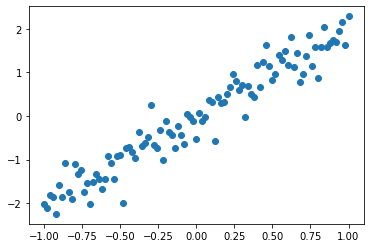

In [2]:
# Creating Linear regression
import numpy as np
import matplotlib.pyplot as plt

x_train = np.linspace(-1,1,101)
y_train = 2 * x_train + np.random.randn(x_train.shape[0]) * 0.33

plt.scatter(x_train,y_train)
plt.show()


<class 'float'>
tf.Tensor(-0.98, shape=(), dtype=float32)
<tf.Variable 'weights:0' shape=() dtype=float32, numpy=0.0>
<function <lambda> at 0x000001A857785730>
<class 'tensorflow.python.keras.optimizer_v2.gradient_descent.SGD'>
<tf.Variable 'weights:0' shape=() dtype=float32, numpy=2.016501>


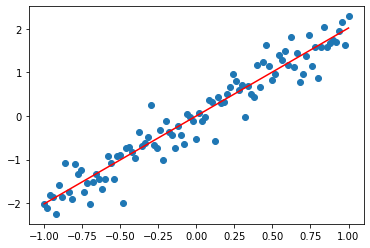

In [3]:
import tensorflow as tf
learningRate : tf.Tensor= 0.01
training_epochs : tf.Tensor = 10
print(type(learningRate))
X : tf.Tensor = tf.constant(x_train,dtype=tf.float32)
Y : tf.Tensor = tf.constant(y_train,dtype=tf.float32)
print(X[1])
weights : tf.Tensor = tf.Variable(0.,dtype=tf.float32,name='weights')
print(weights)
cost = lambda: tf.square(Y - tf.multiply(X,weights))
print(cost)
train_Operation : tf.optimizers = tf.keras.optimizers.SGD(learningRate)
print(type(train_Operation))
for _ in range(training_epochs):
    step : tf.optimizers = train_Operation.minimize(cost,weights)
print(weights)


plt.scatter(X,Y)
plt.plot(X,weights*X,color="r")
plt.show()

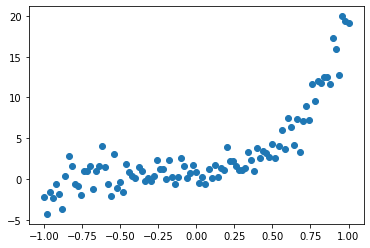

In [18]:
#Fitting Polynomial data


learningRate : tf.Tensor = 0.01
training_epochs : tf.Tensor = 10
x_train :np.ndarray = np.linspace(1,-1,101)
momentum : tf.Tensor = 0.50
    
num_coeffs : int = 6
train_y_coeffs : list = [1,2,3,4,5,6]
train_y = 0

for i in range(num_coeffs):
    train_y += train_y_coeffs[i] * np.power(x_train,i)

train_y += np.random.randn(*x_train.shape) * 1.5 # Adding Noise


plt.scatter(x_train,train_y)
plt.show()
    

In [29]:
X : tf.constant = tf.constant([x_train],dtype=tf.float32)
Y : tf.constant = tf.constant([train_y],dtype=tf.float32)
Weights : tf.Variable = tf.Variable([0] * num_coeffs,dtype=tf.float32)
print(Weights)
%whos

<tf.Variable 'Variable:0' shape=(6,) dtype=float32, numpy=array([0., 0., 0., 0., 0., 0.], dtype=float32)>
Variable          Type                Data/Info
-----------------------------------------------
Weights           ResourceVariable    <tf.Variable 'Variable:0'<...> 0., 0.], dtype=float32)>
X                 EagerTensor         tf.Tensor(\n[[ 1.    0.98<...>=(1, 101), dtype=float32)
Y                 EagerTensor         tf.Tensor(\n[[19.183836  <...>=(1, 101), dtype=float32)
cost              function            <function <lambda> at 0x000001A8654FDD90>
i                 int                 5
learningRate      float               0.01
model             function            <function <lambda> at 0x000001A865586510>
momentum          float               0.5
np                module              <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
num_coeffs        int                 6
plt               module              <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
pre

In [28]:
model = lambda _X,_w : tf.add_n( [tf.multiply(_w[i] , tf.pow(_X,i))  for i in range(num_coeffs)])


SyntaxError: invalid syntax (<ipython-input-28-51c33c8ead61>, line 1)

In [30]:
cost = lambda : tf.pow(Y - model(X,Weights) ,2)
%whos

Variable          Type                Data/Info
-----------------------------------------------
Weights           ResourceVariable    <tf.Variable 'Variable:0'<...> 0., 0.], dtype=float32)>
X                 EagerTensor         tf.Tensor(\n[[ 1.    0.98<...>=(1, 101), dtype=float32)
Y                 EagerTensor         tf.Tensor(\n[[19.183836  <...>=(1, 101), dtype=float32)
cost              function            <function <lambda> at 0x000001A8656C8B70>
i                 int                 5
learningRate      float               0.01
model             function            <function <lambda> at 0x000001A865586510>
momentum          float               0.5
np                module              <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
num_coeffs        int                 6
plt               module              <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
pred              EagerTensor         tf.Tensor(\n[21.776587   <...>pe=(101,), dtype=float32)
step           

In [26]:
train_op = tf.keras.optimizers.SGD(learningRate,momentum)
for _ in range(training_epochs):
    train_op.minimize(cost,Weights)
print(Weights.value())

tf.Tensor([0.7333369 1.5628835 3.841168  5.1937094 4.8150477 5.6304417], shape=(6,), dtype=float32)


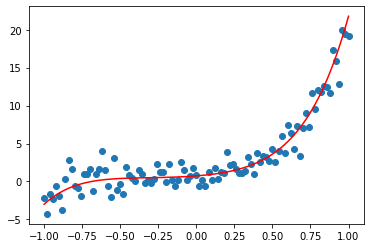

In [27]:
plt.scatter(x_train,train_y)
pred = 0
for i in range(num_coeffs):
    pred += Weights.value()[i] * np.power(x_train,i)

plt.plot(x_train,pred,color='r')